<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/vehicles_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
data=pd.read_csv('/content/dataset.csv')

In [268]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [269]:
data.shape

(1002, 17)

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [271]:
data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [272]:
data['model'].value_counts()

,count
model,
Hornet,65
3500,52
Compass,47
Durango,41
CX-90 PHEV,34
...,...
CX-70,1
C40 Recharge Pure Electric,1
Soul,1


In [273]:
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [274]:
data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


###Handling missing values

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [276]:
data['price'].fillna(data['price'].mean(), inplace=True)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [278]:
data['engine'].fillna('16V GDI DOHC Turbo',inplace=True)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [280]:
data.groupby('fuel')['cylinders'].value_counts()

fuel                  cylinders
Diesel                6.0           59
                      4.0            8
                      8.0            6
Diesel (B20 capable)  8.0            1
E85 Flex Fuel         6.0            5
Electric              0.0            2
Gasoline              4.0          347
                      6.0          207
                      8.0           82
                      3.0           27
Hybrid                4.0          131
                      6.0            6
PHEV Hybrid Fuel      4.0           16
Name: count, dtype: int64

In [281]:
data.groupby('cylinders')['fuel'].value_counts()

cylinders  fuel                
0.0        Electric                  2
3.0        Gasoline                 27
4.0        Gasoline                347
           Hybrid                  131
           PHEV Hybrid Fuel         16
           Diesel                    8
6.0        Gasoline                207
           Diesel                   59
           Hybrid                    6
           E85 Flex Fuel             5
8.0        Gasoline                 82
           Diesel                    6
           Diesel (B20 capable)      1
Name: count, dtype: int64

In [282]:
data['cylinders'].fillna(data['cylinders'].median(),inplace=True)

In [283]:
data['fuel'].fillna('Gasoline',inplace=True)

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   object 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [285]:
data['mileage'].fillna(data['mileage'].mean(),inplace=True)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   object 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   object 
 9   mileage         1002 non-null   float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [287]:
data['body'].value_counts()

,count
body,
SUV,704
Pickup Truck,154
Sedan,80
Cargo Van,36
Passenger Van,13
Hatchback,10
Convertible,1
Minivan,1


In [288]:
data['body'].fillna('SUV',inplace=True)

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   object 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   object 
 9   mileage         1002 non-null   float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            1002 non-null   object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [290]:
data=data.drop('description',axis=1)

In [291]:
data=data.dropna()

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            953 non-null    object 
 1   make            953 non-null    object 
 2   model           953 non-null    object 
 3   year            953 non-null    int64  
 4   price           953 non-null    float64
 5   engine          953 non-null    object 
 6   cylinders       953 non-null    float64
 7   fuel            953 non-null    object 
 8   mileage         953 non-null    float64
 9   transmission    953 non-null    object 
 10  trim            953 non-null    object 
 11  body            953 non-null    object 
 12  doors           953 non-null    float64
 13  exterior_color  953 non-null    object 
 14  interior_color  953 non-null    object 
 15  drivetrain      953 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 126.6+ KB


In [293]:
data.head()

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


###Exploratory Data Analysis

<Axes: xlabel='price', ylabel='Count'>

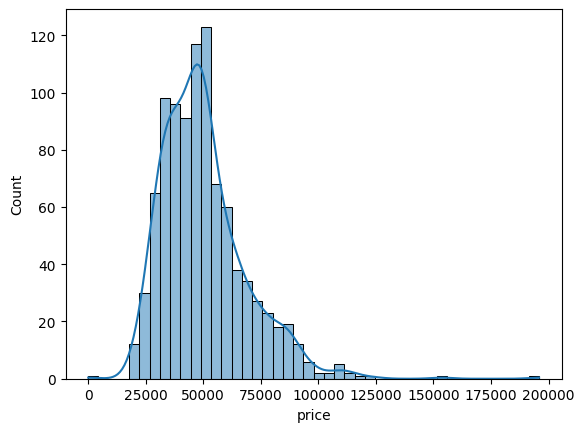

In [294]:
sns.histplot(data=data,x='price',kde='true')

**In this data most of the vehicles are priced around 40000 to 60000**

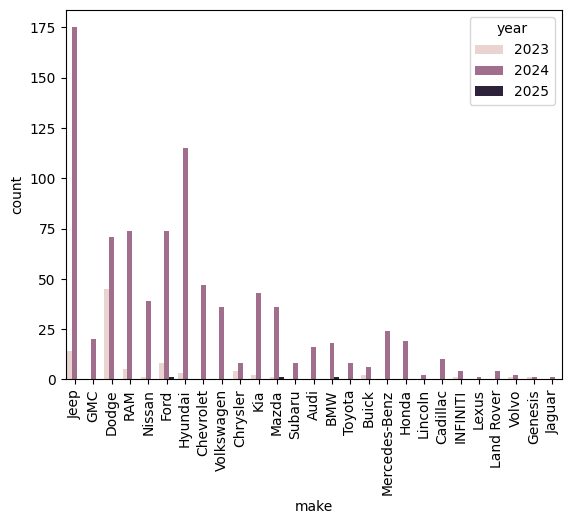

In [295]:
sns.countplot(data=data,x='make',hue='year')
plt.xticks(rotation=90)
plt.show()

**Here most of vehicles are *'Jeep'* model and *'Hyndai'* in the year 2024**

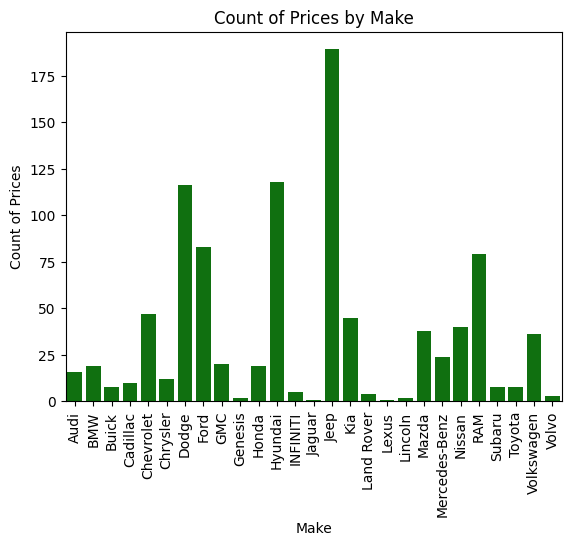

In [296]:
grouped_data = data.groupby('make')['price'].count().reset_index()
sns.barplot(data=grouped_data, x='make', y='price',color='green')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count of Prices')
plt.title('Count of Prices by Make')
plt.show()

<Axes: xlabel='cylinders', ylabel='count'>

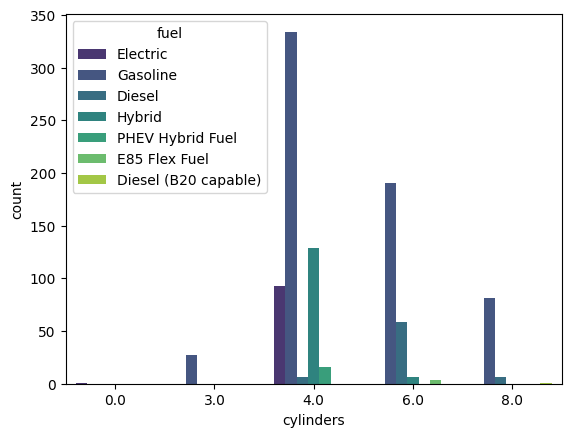

In [297]:
cylinders_and_fuels = data.groupby(['cylinders', 'fuel']).size().reset_index(name='count')
sns.barplot(data=cylinders_and_fuels, x='cylinders', y='count', hue='fuel', palette='viridis')

**Most of the fuels are used at 4 cylinders vehicles**

<Axes: >

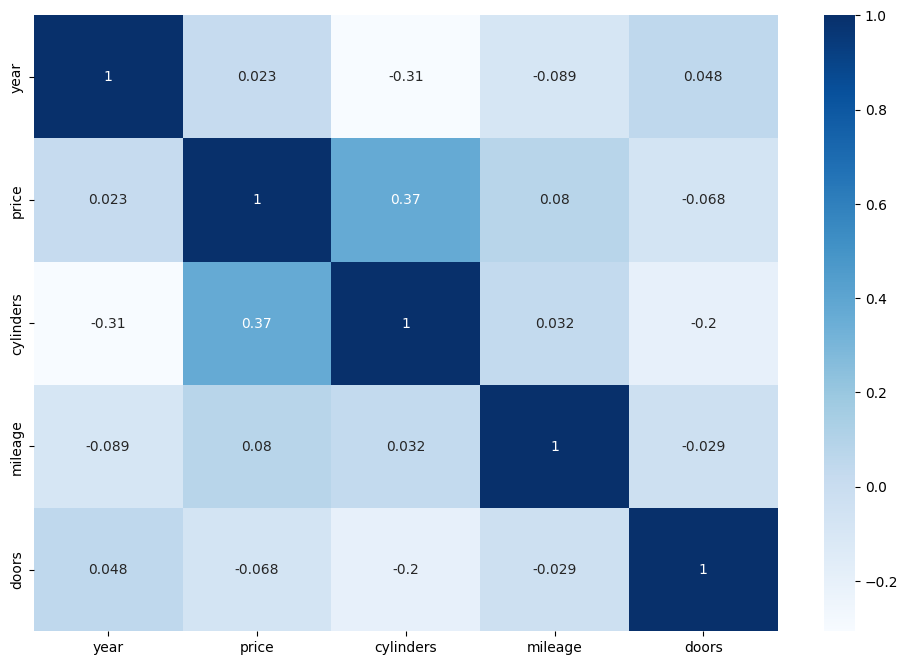

In [298]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

###Model Development

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [300]:
data.head()

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [301]:
columns_categorical = data.select_dtypes(include='object').columns

data = pd.get_dummies(data, columns=columns_categorical, dtype=int)

In [302]:
data.head()

,year,price,cylinders,mileage,doors,name_2023 Buick Envision Essence,name_2023 Buick Envision Preferred,name_2023 Chrysler 300 Touring,name_2023 Chrysler 300 Touring L,name_2023 Chrysler Pacifica Touring L,...,interior_color_Tupelo/Black,interior_color_Volcano Brown,interior_color_White,interior_color_Wicker Beige/Black,interior_color_Wicker Beige/Global Black,interior_color_gray,drivetrain_All-wheel Drive,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,2024,74600.0,6.0,10.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2024,50170.0,6.0,1.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2024,96410.0,8.0,0.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2023,46835.0,8.0,32.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2024,81663.0,6.0,10.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 1001
Columns: 1198 entries, year to drivetrain_Rear-wheel Drive
dtypes: float64(4), int64(1194)
memory usage: 8.7 MB


In [304]:
lr=LinearRegression()

In [305]:
X=data.drop('price',axis=1)
y=data['price']

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
lr.fit(X_train,y_train)

LinearRegression()

In [325]:
predictions=lr.predict(X_test)

In [326]:
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

119364561.26113896
0.6098480209931296


In [327]:
from sklearn.ensemble import RandomForestRegressor

In [328]:
rfr=RandomForestRegressor()

In [329]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [330]:
predictions1=rfr.predict(X_test)

In [331]:
print(mean_squared_error(y_test,predictions1))
print(r2_score(y_test,predictions1))

79640227.07288578
0.7396899726957834
